Загрузим файл о  именах,поле и числе детей с сайта 
https://www.ssa.gov/oact/babynames/limits.html

Соберем все данные в одну таблицу.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
names1880 = pd.read_csv('/Users/kirill/Downloads/names/yob1880.txt', 
                        names= ['name', 'sex', 'births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


Посчитаем количество родившихся в зависимости от пола

In [2]:
names1880.groupby('sex').sum()

,births
sex,
F,90992
M,110491


In [3]:
# Для начала создадим новое поле year
years=range(1880,2017)

pieces = []
columns = [ 'name', 'sex', 'births' ]
for year in years:
    #меняем год в имени файла
    path = '/Users/kirill/Downloads/names/yob%d.txt' %year
    #читаем файл с полями
    frame = pd.read_csv(path, names=columns)
    #дописываем поле года
    frame['year'] = year
    #собираем в единый список
    pieces.append(frame)

#создаем DataFrame, внимание! игнорируем исходные номера строк  
names = pd.concat(pieces,ignore_index = True)
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


Теперь создадим первую сводную таблицу

In [4]:
total_births=names.pivot_table(
    'births', 
    index = 'year', # строки
    columns='sex',  # колонки
    aggfunc=sum     # сумма по births
)
total_births

sex,F,M
year,,
1880,90992,110491
1881,91953,100743
1882,107847,113686
1883,112318,104627
1884,129020,114443
1885,133055,107799
1886,144533,110784
1887,145981,101415
1888,178624,120851


Построим график

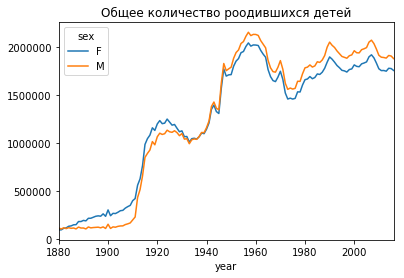

In [5]:
total_births.plot(title='Общее количество роодившихся детей')
plt.show()

Давайте узнаем информацию о нашем DataFrame с именем names

In [6]:
names.info()
#names.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1891894 entries, 0 to 1891893
Data columns (total 4 columns):
name      object
sex       object
births    int64
year      int64
dtypes: int64(2), object(2)
memory usage: 57.7+ MB


Отберем имена только мальчиков и девочек по повторяемости

In [7]:
grouped=names.groupby(['name','sex'])['births'].sum().reset_index()
grouped_m=grouped[grouped.sex=='M']
grouped_f=grouped[grouped.sex=='F']
grouped_f

,name,sex,births
1,Aabha,F,35
4,Aabriella,F,26
5,Aada,F,5
9,Aaden,F,5
15,Aadhira,F,51
17,Aadhvika,F,9
18,Aadhya,F,1188
20,Aadi,F,16
26,Aadison,F,11
30,Aaditri,F,37


In [9]:
most_popular_m=names[names.sex=='M'].drop('year',axis=1).groupby('name').sum().sort_values('births',ascending=False)
most_popular_m_10=most_popular_m[:10].reset_index()
most_popular_m_10

,name,births
0,James,5136026
1,John,5105834
2,Robert,4809176
3,Michael,4338144
4,William,4087525
5,David,3601032
6,Joseph,2592856
7,Richard,2560771
8,Charles,2378806
9,Thomas,2297759


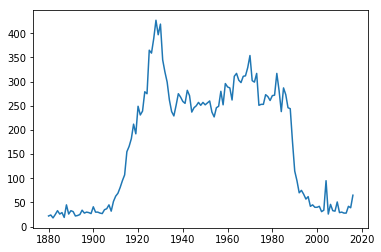

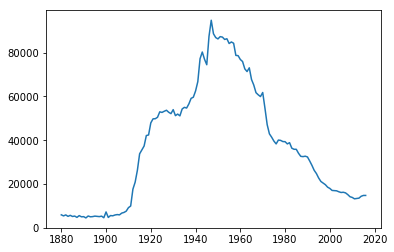

In [10]:
james_f=names[(names.name=='James') & (names.sex=='F')]
plt.plot(james_f['year'],james_f['births'])
plt.show()

james_m=names[(names.name=='James') & (names.sex=='M')]
plt.plot(james_m['year'],james_m['births'])
plt.show()

Домашнее задание

Простое задание
1. Какую долю занимают 100 самых популярных имен среди остальных имен (отдельно для мальчиков и девочек)
2. Построить график таких долей по годам

Средней сложности
1. Найти одинаковые имена используемые для мальчиков и девочек
2. Упорядочить имена по убыванию популярности
3. Построить графики для трех первых по популярности таких имен - количетво рожденных по годам для мальчиков и девочек

Повышенной сложности
1. Найти похожие имена по написанию, например Leslie, Lesley, Leslee, Lesli, Lesly и проследить измение половой принадлежности таких имен в зависимости от года

Срок исполнения:
 - Простое 1 неделя
 - Среднее 2 недели
 - Сложное, на дополнительные баллы 2 недели.